In [1]:
import pytest
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators
import timeit

In [2]:

def create_population_v1(xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, n_pop, homogeneo):
    """
    Função com o objetivo de criar uma população com n indivíduos randômicos, que estaram de acordo com os parâmetros
    escolhidos.

    :param xmax: O valor máximo da coordenada X.
    :param ymax: O valor máximo da coordenada Y.
    :param zlim: O valor máximo da coordenada Z.
    :param xmin: O valor minímo da coordenada X.
    :param ymin: O valor minímo da coordenada Y.
    :param z_min: O valor minímo da coordenada Z.
    :param n_pop: O número de indivíduos desejados na população.
    :param n_dip: O número de dipolos desejados para cada indivíduo.
    :param inclmax: Valor máximo da inclianção magnética.
    :param inclmin: Valor mínimo da inclianção magnética.
    :param declmax: Valor máximo da inclianção magnética.
    :param declmin: Valor mínimo da declianção magnética.
    :param magmax: Valor máximo da magnetização.
    :param magmin: Valor mínimo da magnetização.
    :param homogeneo: True para valores de inclinação, declinação e magnetização iguais para as n dipolos.
                      False é a opção default, onde os valores de inclinação, declinação e magnetização é criada de
                      forma randômica.

    :return pop: Lista com n indivíduos/dipolos criados de forma randômica.
    """
    pop = []
    n_par = 6
    for j in range(n_pop):
        individuo = np.zeros((n_dip, n_par))
        coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n_dip)
        incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, homogeneo)
        for i in range(n_dip):
            individuo[i][0], individuo[i][1], individuo[i][2], individuo[i][3], individuo[i][4], individuo[i][5] = coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]
        pop.append(individuo)
    
    return pop


In [3]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n_dip': 5,
                'n_pop': 100,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [5]:
%timeit create_population_v1(**population)

6.9 ms ± 791 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
def fit_value_v1(X, Y, Z, I, D, pop, tfa_n_dip):
    """
    Função que calcula o fitness de cada indivíduo da população.

    :param X: Pontos de observação na coordenadas X.
    :param Y: Pontos de observação na coordenadas Y.
    :param Z: Pontos de observação na coordenadas Z.
    :param I: Inclinação magnética regional.
    :param D: Declinação magnética regional.
    :param pop: População com n indivíduos.
    :param tfa_n_dip: Anomalia magnética referência.

    :return fit_cada: Lista com o valor de fitness de cara indivíduo da população.
    """
    raio = 100.0
    fit_cada = []

    for i in range(len(pop)):
        spheres = []
        incl = []
        decl = []
        mag = []
        for j in range(len(pop[0])):
            spheres.append((pop[i][j][0], pop[i][j][1], pop[i][j][2], raio))
            incl.append(pop[i][j][3])
            decl.append(pop[i][j][4])
            mag.append(pop[i][j][5])

        tfa_dip = sample_random.tfa_n_dips(incl, decl, mag, len(pop[0]), X, Y, Z, I, D, spheres)
        fit_cada.append(sample_random.f_difference(tfa_n_dip, tfa_dip))
    return fit_cada

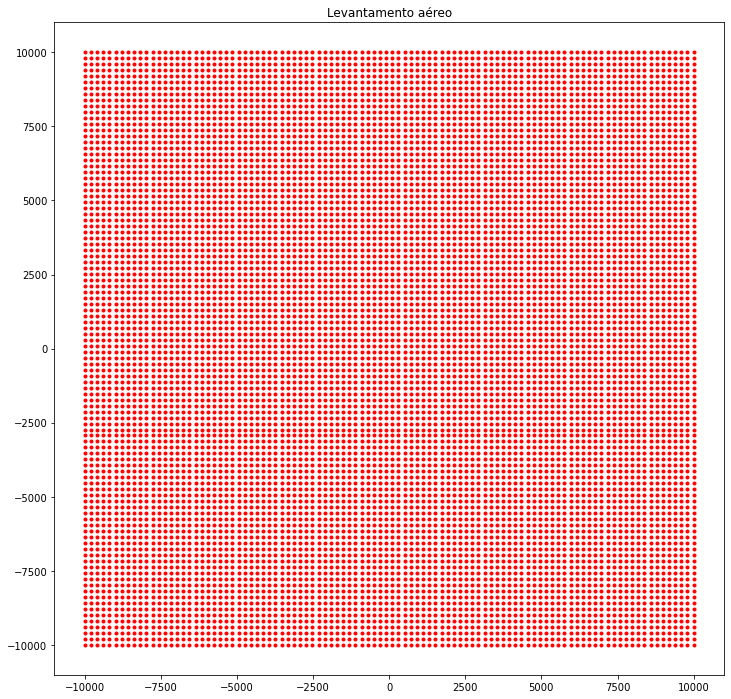

In [7]:
acquisition = {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)

I, D = 30.0, 50.0

pop = Operators.create_population(**population)

In [9]:
def fit_value_v2(X, Y, Z, I, D, pop, tfa_n_dip):
    """
    Função que calcula o fitness de cada indivíduo da população.

    :param X: Pontos de observação na coordenadas X.
    :param Y: Pontos de observação na coordenadas Y.
    :param Z: Pontos de observação na coordenadas Z.
    :param I: Inclinação magnética regional.
    :param D: Declinação magnética regional.
    :param pop: População com n indivíduos.
    :param tfa_n_dip: Anomalia magnética referência.

    :return fit_cada: Lista com o valor de fitness de cara indivíduo da população.
    """
    raio = 100.0
    fit_cada = []

    for i in range(len(pop)):
        spheres = []
        incl = []
        decl = []
        mag = []
        for j in range(len(pop[0])):
            spheres.append((pop[i][j][0], pop[i][j][1], pop[i][j][2], raio))
            incl.append(pop[i][j][3])
            decl.append(pop[i][j][4])
            mag.append(pop[i][j][5])

        tfa_dip = sample_random.tfa_n_dips(incl, decl, mag, len(pop[0]), X, Y, Z, I, D, spheres)
        fit_cada.append(sample_random.f_difference(tfa_n_dip, tfa_dip))
    return fit_cada

In [10]:
%timeit fit_value_v2(X, Y, Z, I, D, pop, tfa_n_bolinhas)

746 ms ± 39.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit fit_value_v1(X, Y, Z, I, D, pop, tfa_n_bolinhas)

727 ms ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
fit_cada1 = fit_value_v1(X, Y, Z, I, D, pop, tfa_n_bolinhas)
fit_cada2 = fit_value_v2(X, Y, Z, I, D, pop, tfa_n_bolinhas)

print(fit_cada1)
print(fit_cada2)

[546.406950102765, 2158.5074117534764, 2714.003244990209, 208.8783110674958, 138.90074561899408, 225.41417618831798, 591.8360364821891, 781.6955722698316, 1358.2038906446726, 1059.3411741470625, 5599.842115145371, 3771.804724009462, 3276.166686245452, 3170.205773300021, 925.9139724666388, 1394.3931765016064, 816.6175209661835, 3110.0676608207373, 229.57828929500258, 303.80268791038407, 701.1887887295248, 1496.2966223177837, 154.27370935292385, 1841.0974797906053, 788.7604546620813, 809.9858222777423, 1101.133382208069, 981.5666158821523, 2468.850683974135, 1370.2856647623714, 295.2658717192052, 896.3541535069459, 138.2337688206332, 1457.995583717786, 299.95785189307963, 3786.116013084017, 11905.975978422039, 793.7629580773562, 8124.857584415029, 4091.727650426651, 665.1071188678271, 7108.78559731841, 132.1581244827279, 196.80665094842482, 1487.8719793054788, 1465.362909764069, 227.16484634296478, 1083.4497796086696, 138.09285551412017, 1758.5707658824142, 5554.822718095302, 2478.899800

In [ ]:
def tournament_selection_v1(pop, fit_cada):
    """
    Função com o objetivo de selecionar os futuros pais, pelo dinâmica do Torneio.

    :param pop: População com n indivíduos.
    :param fit_cada: O valor de fitness para cada n indivpiduos.

    :return chosen: Lista com os n pais.
    """

    pop_1 = pop.copy()
    chosen = []
    capture_select = []
    for i in range(int(0.2 * len(pop))):
        # ---------------------------- Escolhidos para o torneio ---------------------------------#
        index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2 * len(pop)))))
        capture = [index_select[i], fit_cada[index_select[i]]]
        capture_select.append(capture)
        # ---------------------------- Vencedor do torneio ---------------------------------#
        escolhido = pop_1[min(capture_select)[0]]
        # ------------------ Retirada do vencedor da população artificial ------------------------#
        del (pop_1[min(capture_select)[0]])
        # ---------------------------- Vencedores do torneio ---------------------------------#
        chosen.append(escolhido)

    return chosen

In [ ]:
%timeit tournament_selection_v1(pop, fit_cada1)

In [ ]:
pais_torneio = tournament_selection_v1(pop, fit_cada1)

In [ ]:
def crossover_v1(pais_torneio):
    filhos = []
    n_filhos = int(len(pais_torneio) / 2)
    pai = np.array(pais_torneio[0:n_filhos])
    mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])
    prob_pai = random.random()
    prob_mae = random.random()
    den = prob_mae + prob_pai

    for j in range(n_filhos):
        num = (prob_pai * pai[j] + prob_mae * mae[j])
        filho = num / den
        filhos.append(filho)

    return filhos


In [ ]:
%timeit crossover_v1(pais_torneio)

In [ ]:
filho = crossover_v1(pais_torneio)

In [ ]:
def mutacao_v1(filho, xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo):

    prob_mut = 0.01
    for index, rand_mut in enumerate(filho):
        rand_mut = random.random()
        if prob_mut > rand_mut:
            dip_select = random.randint(0, (len(filho[0]) - 1))
            param_select = random.randint(0, (len(filho[0][0]) - 1))
            if param_select <= 2:
                coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n)
                if param_select == 0:
                    filho[index][dip_select][param_select] = float(coodX[0])
                elif param_select == 1:
                    filho[index][dip_select][param_select] = float(coodY[0])
                elif param_select == 2:
                    filho[index][dip_select][param_select] = float(coodZ[0])
            else:
                incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo)
                if param_select == 3:
                    filho[index][dip_select][param_select] = float(incl[0])
                elif param_select == 4:
                    filho[index][dip_select][param_select] = float(decl[0])
                elif param_select == 5:
                    filho[index][dip_select][param_select] = float(mag[0])

    return filho


In [ ]:
filhos_mut = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [ ]:
%timeit mutacao_v1(filho, **filhos_mut)

In [ ]:
filhos = mutacao_v1(filho, **filhos_mut)

In [ ]:
def elitismo_v1(pop, filhos, fit_cada):
    n_fica = (len(pop) - len(filhos))
    df = pd.DataFrame(fit_cada)
    x = df.sort_values(0, ascending=True)
    piores = x.index[n_fica:]
    for index, pos in enumerate(piores):
        pop[pos] = filhos[index]

    return pop

In [ ]:
%timeit elitismo_v1(pop, filhos, fit_cada1)